In [36]:
import numpy as np
from matplotlib import pyplot as plt
import skimage
import scipy

In [37]:
image1 = skimage.io.imread('Data-2/cells/9343 AM.bmp', as_gray=True)
image2 = skimage.io.imread('Data-2/cells/10905 JL.bmp', as_gray=True)
image3 = skimage.io.imread('Data-2/cells/43590 AM.bmp', as_gray=True)

In [38]:
imageGT1 = skimage.io.imread('Data-2/cells/9343 AM Edges.bmp', as_gray=True)
imageGT2 = skimage.io.imread('Data-2/cells/10905 JL Edges.bmp', as_gray=True)
imageGT3 = skimage.io.imread('Data-2/cells/43590 AM Edges.bmp', as_gray=True)

def roc(filtered, groundTruth):
    groundTruth = np.logical_not(groundTruth/255)

    TP = np.sum((filtered == 1) & (groundTruth == 1))
    FP = np.sum((filtered == 1) & (groundTruth == 0))
    TN = np.sum((filtered == 0) & (groundTruth == 0))
    FN = np.sum((filtered == 0) & (groundTruth == 1))

    # Compute TPR and FPR
    tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
    fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

    print(f'Sobel: TPR {tpr} FPR {1-fpr}')

    

In [39]:
# def plot_intensity_histogram(image):
#     # Flatten the image to a 1D array
#     flattened_image = image.flatten()
#     print(flattened_image)
#     # Plot histogram of pixel intensities
#     plt.hist(flattened_image, bins=256, range=(0, 1), color='blue', alpha=0.7)
#     plt.title('Intensity Histogram')
#     plt.xlabel('Pixel Intensity')
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

In [40]:
def zero_cross(image):
    z_c_image = np.zeros(image.shape)
    thresh = np.absolute(image).mean() * 0.75
    h,w = image.shape
    for y in range(1, h - 1):
        for x in range(1, w - 1):
            patch = image[y-1:y+2, x-1:x+2]
            p = image[y, x]
            maxP = patch.max()
            minP = patch.min()
            if (p > 0):
                zeroCross = True if minP < 0 else False
            else:
                zeroCross = True if maxP > 0 else False
            if ((maxP - minP) > thresh) and zeroCross:
                z_c_image[y, x] = 1
    return z_c_image

In [41]:
def sobel_edge_detector(image, threshold=0.1): 
    # Define Sobel operators
    sobel_x = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    # # Apply Sobel operators to compute gradients
    gradient_x = scipy.signal.convolve2d(image, sobel_x, mode='same')
    gradient_y = scipy.signal.convolve2d(image, sobel_y, mode='same')

    # # Compute magnitude of gradients
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    return gradient_magnitude

In [42]:
sobel_edges_image1 = sobel_edge_detector(image1, 0.15)
sobel_edges_image2 = sobel_edge_detector(image2, 0.15)
sobel_edges_image3 = sobel_edge_detector(image3, 0.15)


In [43]:
th_1 = skimage.filters.threshold_otsu(sobel_edges_image1)
th_2 = skimage.filters.threshold_otsu(sobel_edges_image2)
th_3 = skimage.filters.threshold_otsu(sobel_edges_image3)

print(th_1)
print(th_2)
print(th_3)


thresholded_1 = sobel_edges_image1 > th_1
thresholded_2 = sobel_edges_image2 > th_2
thresholded_3 = sobel_edges_image3 > th_3


roc(thresholded_1, imageGT1)
roc(thresholded_2, imageGT2)
roc(thresholded_3, imageGT3)



0.16472946986658055
0.17605271031961522
0.08422484241092959
Sobel: TPR 0.8332955781080101 FPR 0.8670664557391741
Sobel: TPR 0.8950593345226092 FPR 0.8870712899229531
Sobel: TPR 0.7399911429481552 FPR 0.8797166519036657


(-0.5, 1279.5, 1023.5, -0.5)

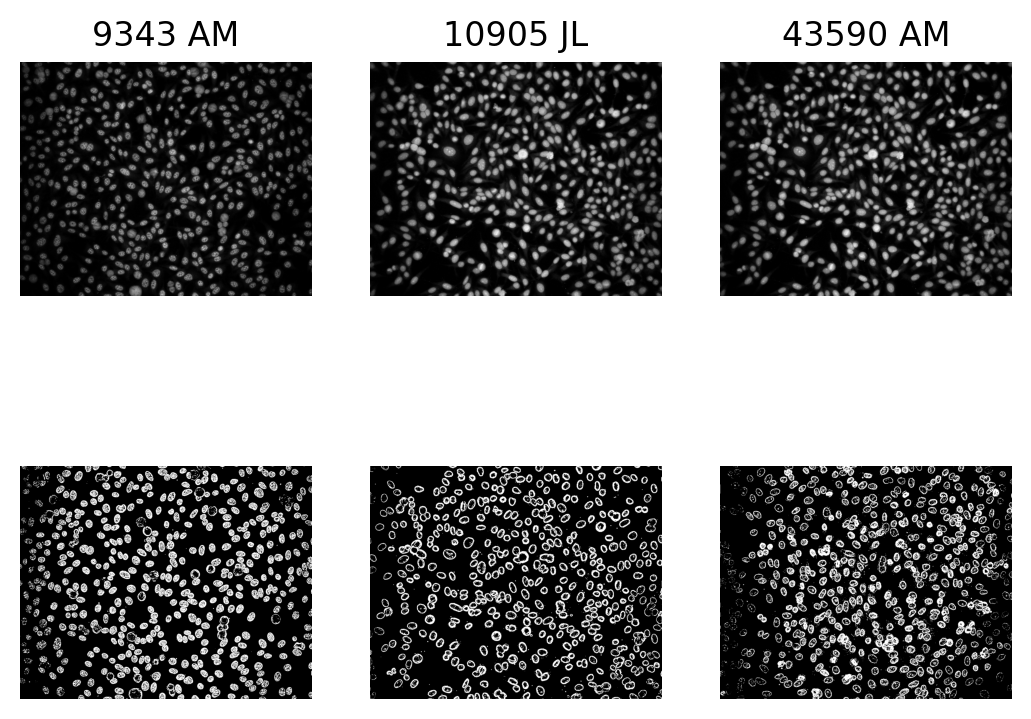

In [44]:
plt.figure(dpi=200)

plt.subplot(2,3,1)
plt.imshow(image1, cmap='gray')
plt.title('9343 AM')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(image2, cmap='gray')
plt.title('10905 JL')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(image2, cmap='gray')
plt.title('43590 AM')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(thresholded_1, cmap='gray')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(thresholded_2, cmap='gray')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(thresholded_3, cmap='gray')
plt.axis('off')
